**NOTEBOOK 2**

**TRAINING DATA**

Importing kaggle.json file.

Required for interacting with Kaggle.

In [ ]:
from google.colab import files
myfile= files.upload()

Saving kaggle.json to kaggle.json


Setting up environment virables, so that kaggle api can work properly.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Now, downloading the dataset from kaggle which we uploaded in the previous notebook.

In [ ]:
!kaggle datasets download -d ritikakalra/ship-images

 83% 67.0M/80.9M [00:01<00:00, 39.0MB/s]
100% 80.9M/80.9M [00:01<00:00, 64.2MB/s]


Unzipping the downloaded data.

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/train/1/2835446.jpg  
  inflating: images/train/1/2835451.jpg  
  inflating: images/train/1/2835452.jpg  
  inflating: images/train/1/2835453.jpg  
  inflating: images/train/1/2835454.jpg  
  inflating: images/train/1/2835460.jpg  
  inflating: images/train/1/2835465.jpg  
  inflating: images/train/1/2835466.jpg  
  inflating: images/train/1/2835467.jpg  
  inflating: images/train/1/2835468.jpg  
  inflating: images/train/1/2835475.jpg  
  inflating: images/train/1/2835479.jpg  
  inflating: images/train/1/2835480.jpg  
  inflating: images/train/1/2835481.jpg  
  inflating: images/train/1/2835483.jpg  
  inflating: images/train/1/2835484.jpg  
  inflating: images/train/1/2835487.jpg  
  inflating: images/train/1/2835488.jpg  
  inflating: images/train/1/2835489.jpg  
  inflating: images/train/1/2835493.jpg  
  inflating: images/train/1/2835495.jpg  
  inflating: images/train/1/2835497.jpg  
  inflating: images/train

Renaming the directories so that the model can predict according to the name of the ship.

In [ ]:
os.rename('images/train/1','images/train/Cargo')

In [ ]:
os.rename('images/train/2','images/train/Military')

In [ ]:
os.rename('images/train/3','images/train/Carrier')

In [ ]:
os.rename('images/train/4','images/train/Cruise')

In [ ]:
os.rename('images/train/5','images/train/Tanker')

In [ ]:
os.listdir("images/train")

['Tanker', 'Cargo', 'Military', 'Cruise', 'Carrier']

Importing the required libraries.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Creating batch size.

In [ ]:
bs=25

Creating data bunch objects.

In [ ]:
path="images/train"
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path(path), valid_pct=0.2, bs=25, size=224, ds_tfms=get_transforms())

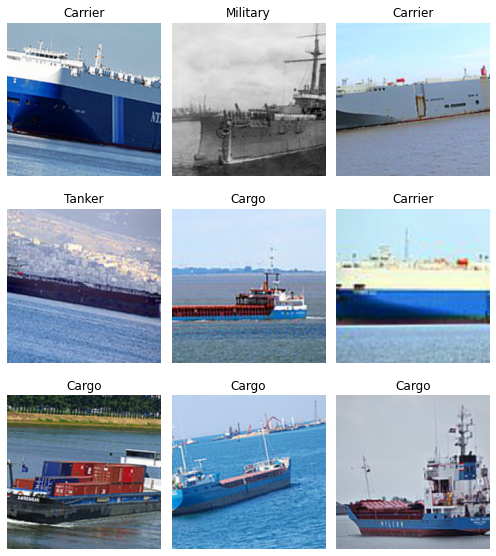

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

Training: resnet50

We will use resnet50. Basically, resnet50 usually performs better because it is a deeper network with more parameters.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Training our model for 8 epochs.

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.031294,0.692322,0.770259,01:32
1,0.703264,0.399378,0.857143,01:33
2,0.484935,0.364493,0.866332,01:32
3,0.426306,0.286927,0.897243,01:31
4,0.351920,0.243659,0.911445,01:32
5,0.279119,0.266028,0.896408,01:32
6,0.236518,0.219307,0.912281,01:32
7,0.215702,0.223307,0.913952,01:33


Saving the model on our drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/projects/ship_classify",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/projects/ship_classify"

In [ ]:
learn.save(my_dir+"/Stage-1")

Again training the model after unfreezing the data.

Generally, this step increases the accuracy.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.307657,0.364921,0.888053,02:02
1,0.480354,0.489663,0.813701,02:01
2,0.434102,0.286770,0.885547,02:00
3,0.378941,0.300530,0.893901,02:02
4,0.292337,0.213965,0.924812,02:01
5,0.191781,0.205778,0.927318,02:00
6,0.109348,0.144961,0.949039,02:00
7,0.074971,0.143884,0.947368,02:00


Saving the generated model.

In [ ]:
learn.export(my_dir+"/export.pkl")